1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

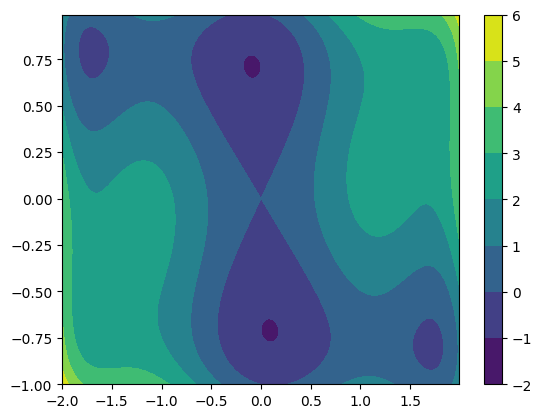


Starting Point:  [-0.1, 0.7]
Function Value:  -1.0316284534898772
[x, y]:  [-0.08984202  0.7126564 ]

Starting Point:  [0.1, -0.7]
Function Value:  -1.0316284534898774
[x, y]:  [ 0.08984201 -0.7126564 ]

Starting Point:  [0, 0]
Function Value:  -1.0316284534898774
[x, y]:  [ 0.08984202 -0.7126564 ]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import optimize
from scipy import fftpack
from scipy.fftpack import fft, fftfreq
from scipy.integrate import odeint


def six_hump_camelback(x):
    func=((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)
    return func

x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y, sparse=True)
func = six_hump_camelback((X, Y))

x1, y1 = np.meshgrid(x, y)
plt.contourf(x, y, func)
plt.colorbar()
plt.show()


# From the figures, wthere are 2 global minima exists. 
# First global minima is at ~(-0.1, 0.7) and the second global minima is at ~(0.1, -0.7)

starting_points = [ [-0.1, 0.7], [0.1, -0.7], [0, 0]] # first 2 values are decided after analysing the image.

for starting_point in starting_points:
    result = optimize.basinhopping(six_hump_camelback, starting_point, niter = 200)
    print("\nStarting Point: ", starting_point)
    print("Function Value: ", result.fun)
    print("[x, y]: ", result.x)



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

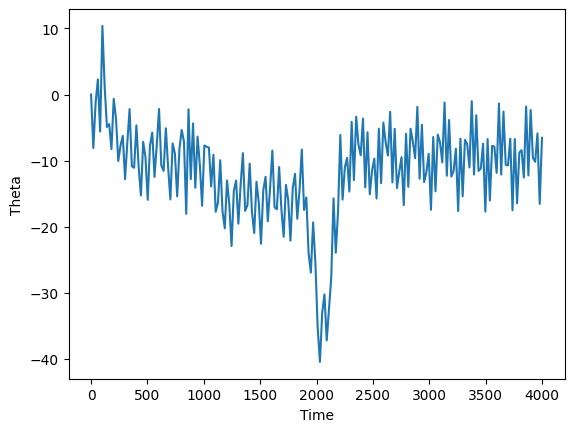

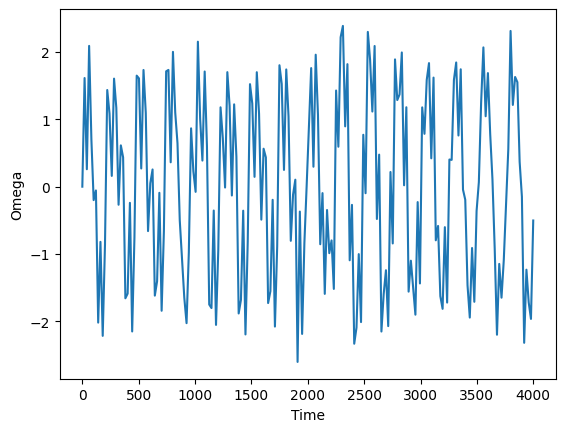

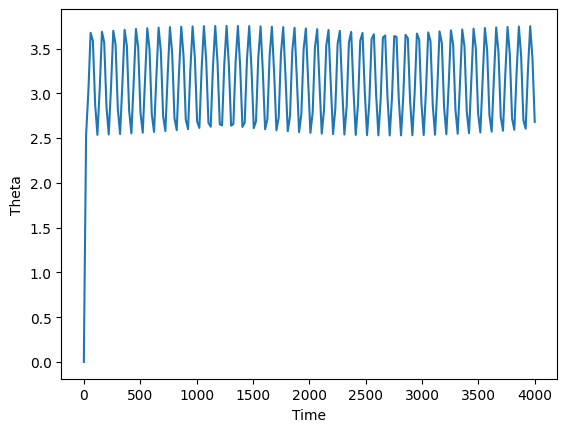

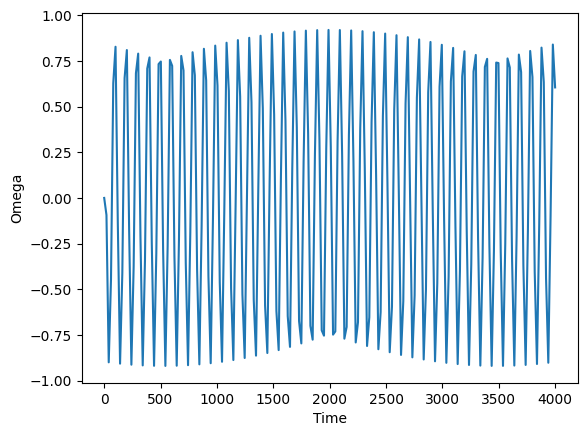

In [24]:
def pendulum_ode(y, t, Q, d, omega):
    theta, omega = y
    dydt = [omega, -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return dydt


y0 = [0, 0]
Q = 2.0
d = 1.5
Omega = 0.65

t = np.linspace(0, 4000, 200)

sol = odeint(pendulum_ode, y0, t, args=(Q, d, omega))

theta = sol[:, 0]
omega = sol[:, 1]

# Create the plots
plt.figure()
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')

plt.figure()
plt.plot(t, omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.show()


#Chaotic
y0 = [0,0]
t = np.linspace(0, 4000, 200)

sol = odeint(deriv, y0, t, args=(0.5, 2.0, 1.5))
theta = sol[:, 0]
omega = sol[:, 1]

plt.figure()
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')

plt.figure()
plt.plot(t, omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [3]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-01-20 18:19:14--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-01-20 18:19:15--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb11a90fd91ecbbe465db9a826b.dl.dropboxusercontent.com/cd/0/inline/B07EduGhRtCwNCVF5kxaMBxH3WpIZN1mUW7QcdKnb2IDsdQfi5ttNwzlRTA_gyLOYKD5Xj6Ke0NmyY2F4WQl_yp9I-zpP5J6hNVfKOXUIUc1UMnwzBlHW9OHNwKo5JCG_SA5eKwZHNBk6reI0_c15ScvgCm3URV9Gc8wgp-JWOgC5w/file# [following]
--2023-01-20 18:19:15--  https://ucb11a90fd91ecbbe465db9a826b.dl.dropboxusercontent.com/cd/0/inline/B07EduGhRtCwNCVF5kxaMBxH3WpIZN1mUW7QcdKnb2IDsdQfi5tt

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


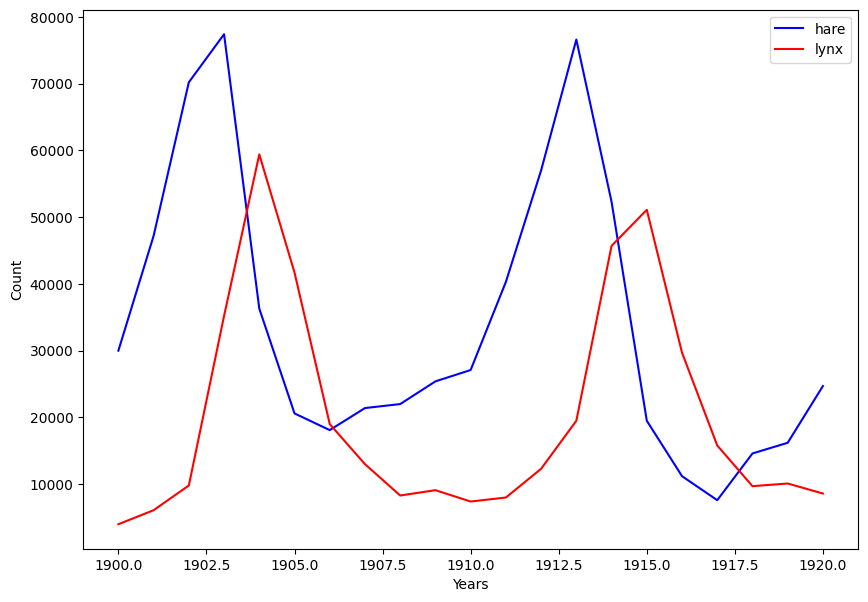

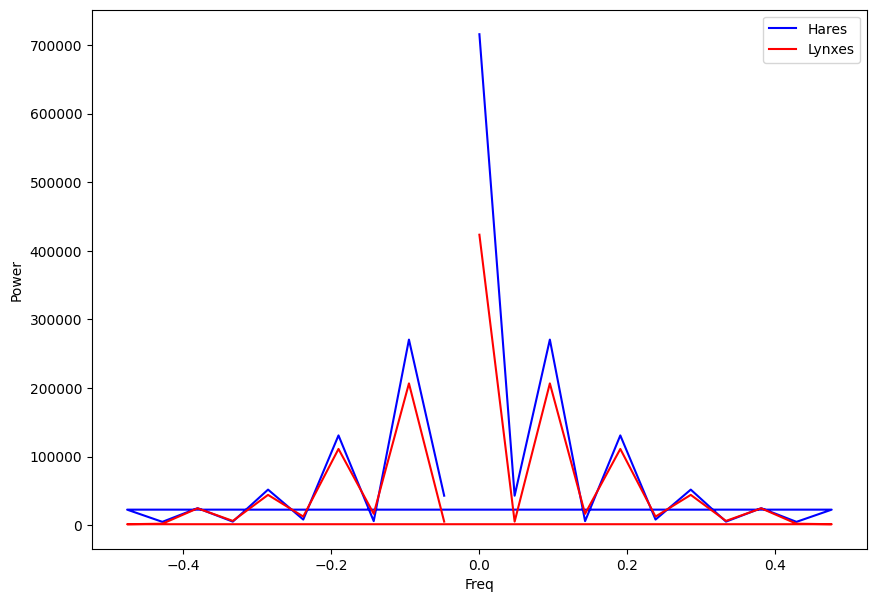

Period of hares:  10.5
Period of lynxes:  10.5


In [14]:
data = pd.read_csv("populations.txt", delimiter = "\t")
print(data)

hare = np.array(data["hare"])
lynx = np.array(data["lynx"])
year = np.array(data["# year"])

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(year, hare, label = "hare", color = "blue")
plt.plot(year, lynx, label = "lynx", color = "red")
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend()
plt.show()


fft_hares = fft(hare)
fft_lynxes = fft(lynx)

power_hares = np.abs(fft_hares)
power_lynxes = np.abs(fft_lynxes)
    
sample_freqs = fftfreq(len(year))    

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(sample_freqs, power_hares, label = "Hares", color = "blue")
plt.plot(sample_freqs, power_lynxes, label = "Lynxes", color = "red")
plt.xlabel('Freq')
plt.ylabel('Power')
plt.legend()
plt.show()
mask = np.where(sample_freqs > 0)
freqs = sample_freqs[mask]
peak_hares = freqs[power_hares[mask].argmax()]
peak_lynxes = freqs[power_lynxes[mask].argmax()]

print("Period of hares: ", 1/peak_hares)
print("Period of lynxes: ", 1/peak_lynxes)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

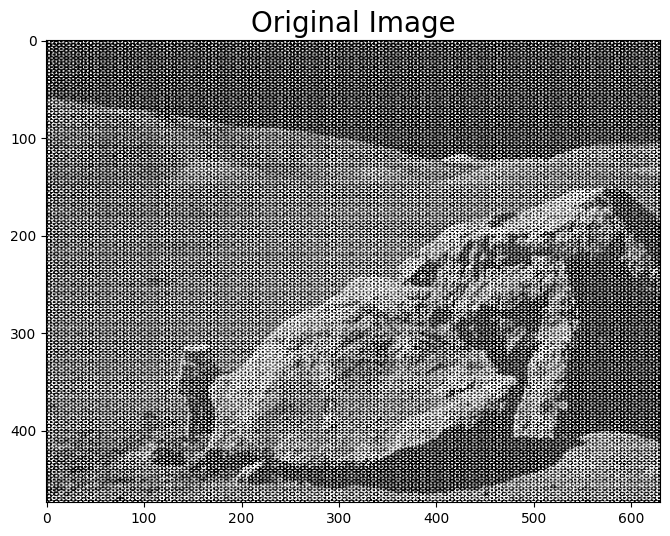

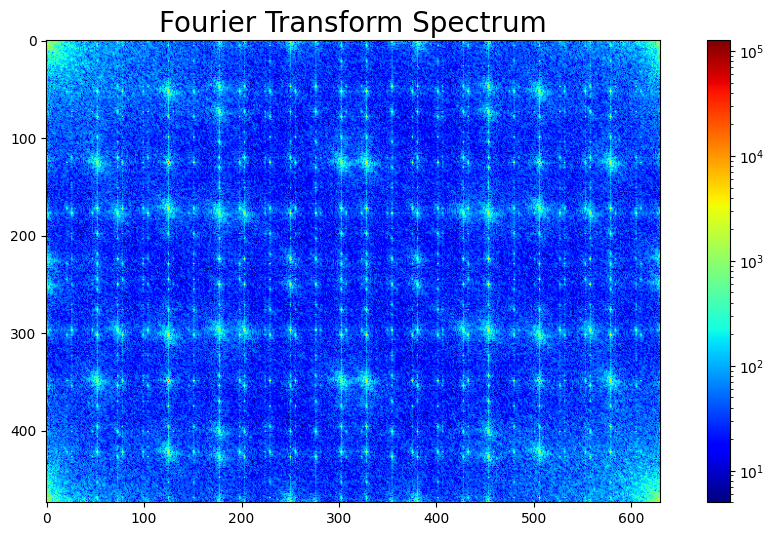

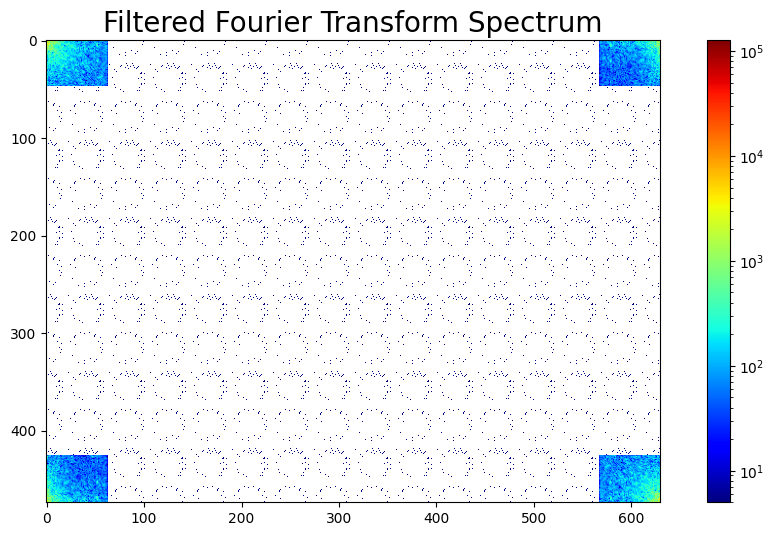

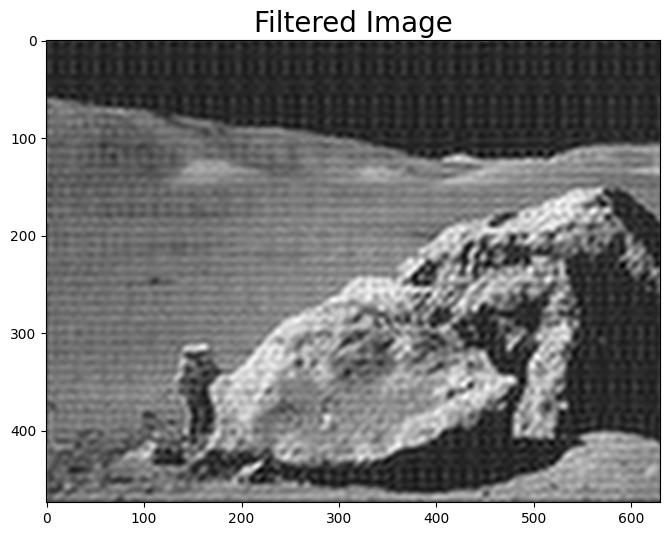

In [8]:
#print the image
image = plt.imread('moonlanding.png')
fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(image, cmap = "gray")
plt.title('Original Image', size = 20)
plt.show()

#Perform 2D FFT and plot the FFT image
fft_image = fftpack.fft2(image)
fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5), cmap = "jet")
plt.title('Fourier Transform Spectrum', size = 20)
plt.colorbar()
plt.show()

frac = 0.1
r, c = fft_image.shape


# Setting values to zero
fft_image[int(r * frac): int(r * (1 - frac))] = 0 # for rows
fft_image[:, int(c * frac): int(c * (1 - frac))] = 0 # for columns

fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5), cmap = "jet")
plt.title('Filtered Fourier Transform Spectrum', size = 20)
plt.colorbar()
plt.show()



# Discard imaginery part
filtered = fftpack.ifft2(fft_image).real
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Filtered Image', size = 20)
plt.imshow(filtered, plt.cm.gray)
plt.show()

